In [4]:
#################################
### Using Pandas ################
#################################
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [5]:
######
#series
######

obj = Series([3,6,9,12])          #create series object
obj.values                        #see the values of the Series 
obj.index                         #see index 

#examples 
ww2_cars = Series([86666,43344,66666,888888,83752],index=['USSR','Germany','China','Japan','USA'])
ww2_cars['USA']                   #slice an series 
#check which counties had cars greater than 4 mill
ww2_cars > 55555                  #this will return indexed boolean list 
ww2_cars[ww2_cars>55555]          #if cars >5555 listed it here 
#other functions 
'USSR' in ww2_cars                #check if ussr is in the index,return true or false
ww2_dict = ww2_cars.to_dict()     #convert to dictionary
ww2_series = Series(ww2_dict)     #convert it back to series

#other examples 
pd.isnull(ww2_cars)              #check if there is null
pd.notnull(ww2_cars)             #check if not null
ww2_cars + ww2_cars              #add two series, same as arry addition 
ww2_cars.name = 'world war two, cars number'  #name of the series objec 
ww2_cars.index.name = 'Countries'  #label the index of the series 
ww2_cars

Countries
USSR        86666
Germany     43344
China       66666
Japan      888888
USA         83752
Name: world war two, cars number, dtype: int64

In [11]:
####################
### Data  frames 
###################

import numpy as np
import pandas as pd
from pandas import Series, DataFrame

df = pd.read_csv('data.csv',sep=',',encoding = 'iso-8859-1')      #read csv file
df = pd.read_csv('data.csv',sep=',',encoding = 'iso-8859-1',      #only read certain columns into the dataframe
                 usecols=['country','year','PPPPC',               
                          'rule_law','control_corruption',
                          'regulatory_quality'])
df.head(5)                                #print the first 5 row of the data

,country,year,PPPPC,rule_law,control_corruption,regulatory_quality
0,Afghanistan,2012,1875.016406,-1.723030,-1.411566,-1.210008
1,Albania,2012,10517.939210,-0.569308,-0.723548,0.167966
2,Algeria,2012,13273.173880,-0.753692,-0.475629,-1.292589
3,Angola,2012,6670.668082,-1.276352,-1.295879,-0.977499
4,Anguilla,2012,29051.187910,1.398365,1.294390,1.309333


In [12]:
###retrieve columns####
df.columns                                #return all the column name 
df.country                                #return the country column
df['PPPPC']                               #return ppppc column
DataFrame(nfl_frame,columns=['country','year','PPPPC']) #return multiple columns
#retrieve rows 
df.head()                                 #retrieve first 5 rows
df.tail(1)                                #retrieve end row
df.ix[0:3]                                #retrieve the one to fourth row 
#retrieve rows and columns
df[0:3][['country','year','PPPPC']]       #retrieve row and columns 
df[(df.PPPPC>10000) & (df.rule_law>0)]    #retrieve row based on columns values 
#modify data columns
df['year'] = 1990                         #change everything to 1990
nrow = df.shape[0]                        #get the length of the index
df['year'] = np.arange(nrow)              #assing value from 0 to length
df.index.values                           #values of all row indexes
df.columns.values                         #values of all columns headers 
df = df.rename(columns={'control_corruption':'corruption'})   #change column name 
df.drop(0)                                #drop row
df.drop('regulatory_quality',axis=1) #drop a column, use axis 1 
df.head()

NameError: name 'nfl_frame' is not defined

In [14]:
#######
#data alignment
#######
import numpy as np
from pandas import Series,DataFrame
import pandas as pd

df1= DataFrame(np.arange(4).reshape(2,2),columns=list('AB'),index=['NYC','LA'])
print (df1)
df2 = DataFrame(np.arange(9).reshape(3,3),columns=list('ADC'),index=['NYC','SF','LA'])
print (df2)
dfSum = df1+df2                                 #will create missing values 
print (dfSum)
dfSumZero = df1.add(df2,fill_value=0)           #will make two data frame confortable, with 0 values
print (dfSumZero)
##### ranks ans sort #########
df = DataFrame(np.arange(24).reshape(8,3),columns=list('ABC'))
print ('Sort by index: \n')
print (df.sort_index()  )                                           #sort by index
print ('sort by columns \n')
print (df.sort_values(['A','B'],ascending=[True,True]))             #sort by multiple columns


     A  B
NYC  0  1
LA   2  3
     A  D  C
NYC  0  1  2
SF   3  4  5
LA   6  7  8
       A   B   C   D
LA   8.0 NaN NaN NaN
NYC  0.0 NaN NaN NaN
SF   NaN NaN NaN NaN
       A    B    C    D
LA   8.0  3.0  8.0  7.0
NYC  0.0  1.0  2.0  1.0
SF   3.0  NaN  5.0  4.0
Sort by index: 

    A   B   C
0   0   1   2
1   3   4   5
2   6   7   8
3   9  10  11
4  12  13  14
5  15  16  17
6  18  19  20
7  21  22  23
sort by columns 

    A   B   C
0   0   1   2
1   3   4   5
2   6   7   8
3   9  10  11
4  12  13  14
5  15  16  17
6  18  19  20
7  21  22  23


In [43]:
##########
#Summary Statistics
##########
import numpy as np
import pandas as pd
from pandas import Series, DataFrame


df = pd.read_csv('data.csv',sep=',',                              #only read certain columns into the dataframe
                 usecols=['country','year','PPPPC',               
                          'rule_law','control_corruption',
                          'regulatory_quality'])
df.sum()                            #sums of all variables 
df.sum(axis=1)                      #row sum of all records 
df.min()                            #min of all variables
df.max()                            #max of all variables 
df.min(axis=1)                      #min of a row 
df.cumsum()                         #accumulate sum 
df.describe()                       #similary to stata describe function 


,year,PPPPC,rule_law,control_corruption,regulatory_quality
count,194.0,189.000000,193.000000,192.000000,192.000000
mean,2012.0,17796.134265,-0.099535,-0.084493,-0.075357
std,0.0,20075.733644,0.981295,0.996478,0.979621
min,2012.0,631.791705,-2.450159,-1.590733,-2.525228
25%,2012.0,NaN,NaN,NaN,NaN
50%,2012.0,NaN,NaN,NaN,NaN
75%,2012.0,NaN,NaN,NaN,NaN
max,2012.0,148615.935400,1.949052,2.391255,1.963062


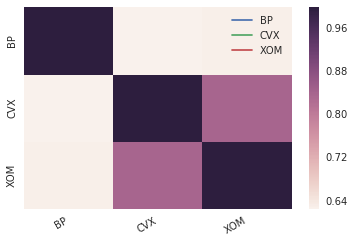

In [64]:
#############
##covariance and corrolation 
#############
import pandas.io.data as pdweb
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#####show youtube videos ########
from IPython.display import YouTubeVideo
#CoVariance
YouTubeVideo('xGbpuFNR1ME')
#Correlation
YouTubeVideo('4EXNedimDMs')

#get financial info from web 
prices = pdweb.get_data_yahoo(['CVX','XOM','BP'],
                              start=datetime.datetime(2010,1,1),
                              end=datetime.datetime(2016,1,1))['Adj Close']
volume = pdweb.get_data_yahoo(['CVX','XOM','BP'], 
                               start=datetime.datetime(2010, 1, 1), 
                               end=datetime.datetime(2016, 1, 1))['Volume']
rets = prices.pct_change()             #percent chnage
prices.plot()                          #plot the price series 
sns.heatmap(rets.corr())               #corrlation heat map



In [78]:
##########
##Missing data
##########
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

data = Series(['one','two', np.nan, 'four'])
data.isnull()                 #return boolean list
data.dropna()                 #dropped all na values 
#data frame 
df = DataFrame([[1,2,3],[np.nan,5,6],[7,np.nan,9],[np.nan,np.nan,np.nan]])
df.dropna()                   #any variable with na, obs will be dropped 
df.dropna(axis=1)             #drop columns with missing data
df.fillna(1)                  #fill missing value with 1 
df.fillna({0:0,1:1,2:2})      #fill na, diff values for diff columns
#if we want to modify original data frame 
df.fillna(0,inplace=True)     #change the original df 

,0,1,2
0,1.0,2.0,3.0
1,0.0,5.0,6.0
2,7.0,0.0,9.0
3,0.0,0.0,0.0


In [102]:
##########
##Index Hierarchy
##########
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import randn

#multiple index level
ser= Series(randn(6),
            index=[[1,1,1,2,2,2],
                   ['a','b','c','a','b','c']])
ser.index                         #show index
ser[1]                            #show the first level of elements
ser[:,'a']                        #show all elements with index a 

#create df with hierarchial series 
df = ser.unstack()                #will convert to df with row and column indexes

# We can also apply multiple level indexing to DataFrames
df2 = DataFrame(np.arange(16).reshape(4,4),
                    index=[['a','a','b','b'],[1,2,1,2]],
                    columns=[['NY','NY','LA','SF'],['cold','hot','hot','cold']])                                                   
print df2
df2.index.names = ['index_1','index_2']         #assign names of different levels of indexes
df2.columns.names=['Cities','Temp']             #assign names of different levels of indexes
df2.swaplevel('Temp','Cities',axis=1)           #swap indexes 
df2.sortlevel(1)                                #sort by index
#######
#######
print df2.sum(level='Temp',axis=1)                    #aggregations by group


      NY      LA   SF
    cold hot hot cold
a 1    0   1   2    3
  2    4   5   6    7
b 1    8   9  10   11
  2   12  13  14   15
Temp             cold  hot
index_1 index_2           
a       1           3    3
        2          11   11
b       1          19   19
        2          27   27


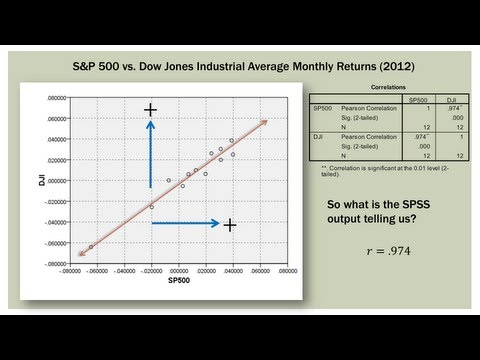

In [44]:
##############end if this session 